<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

## Oefening 'Zonnecrème'

In [2]:
# beschouwde parameters zijn 'haarkleur', 'lengte', 'gewicht' en 'zonnecrème'
# alle parameters zijn categorisch, dus we zetten ze om naar numerieke 
# haarkleur bruin is '0'. blond is '1' en rood is '2'
# klein is '0', gemiddelde lengte is '1' en groot is '2'
# licht is '0', gemiddeld is '1' en zwaar is '2'
# geen zonnecrème is '0', wel zonnecrème is '1' 
# waarden van deze parameters staan in resp. kolom 0, 1, 2, 3 van matrix data
# elke rij komt overeen met één zonnebader
# laatste kolom geeft of persoon verbrandt ('1') of niet ('0').
data = np.array(
      [[1, 1, 0, 0, 1],
       [1, 2, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [2, 1, 0, 0, 0],
       [0, 2, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [1, 0, 0, 1, 0]])

In [3]:
# parameters en klasse onderscheiden
parameters = data[:, :4]        # eerste 4 kolommen van matrix zijn beschouwde parameters
klasse = data[:, 4]             # laatste kolom zijn klasse waartoe persoon behoort

In [4]:
print(parameters)

[[1 1 0 0]
 [1 2 1 1]
 [0 0 1 1]
 [1 0 1 0]
 [2 1 0 0]
 [0 2 2 0]
 [0 1 2 0]
 [1 0 0 1]]


In [5]:
print(klasse)

[1 0 0 1 0 0 0 0]


In [6]:
# beslissingsboom genereren op basis van data
beslissingsboom = tree.DecisionTreeClassifier(criterion="gini")   # boom wordt aangemaakt via gini-index
beslissingsboom.fit(parameters, klasse)                           # boom genereren die overeenkomt met data

DecisionTreeClassifier()

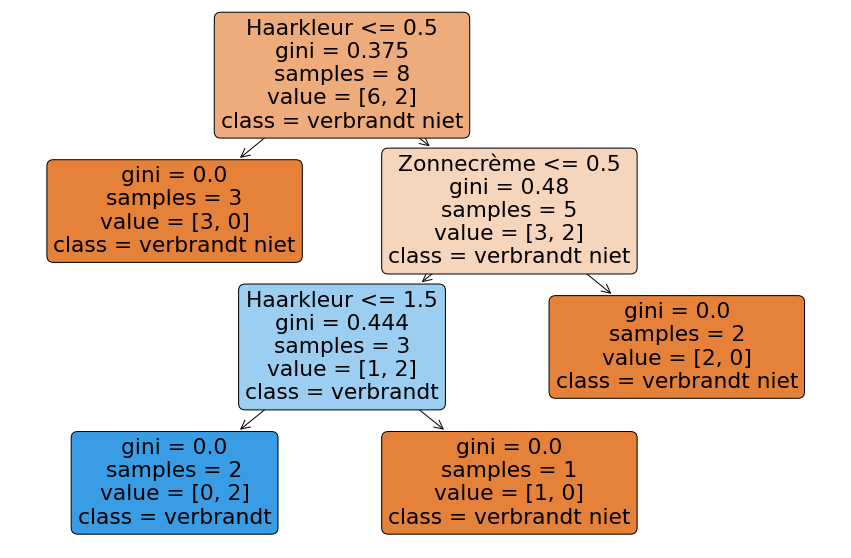

In [7]:
plt.figure(figsize=(15,10))  
tree.plot_tree(beslissingsboom, 
               class_names=["verbrandt niet", "verbrandt"], 
               feature_names=["Haarkleur", "Lengte", "Gewicht", "Zonnecrème"], 
               filled=True, rounded=True)
plt.show()

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook AI in de Zorg, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 